<a href="https://colab.research.google.com/github/ivanmendozav/Clases/blob/main/IA_prueba_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import load_dataset,get_dataset_names

### Generar imagenes con ruido

In [33]:
n=5
m=4
s=20

P = np.array([ [2,2,2,2],[2,0,0,2],[2,2,2,2],[2,0,0,0],[2,0,0,0] ])
C = np.array([ [2,2,2,2],[2,0,0,0],[2,0,0,0],[2,0,0,0],[2,2,2,2] ])
H = np.array([ [2,0,0,2],[2,0,0,2],[2,2,2,2],[2,0,0,2],[2,0,0,2] ])
E = np.array([ [2,2,2,2],[2,0,0,2],[2,2,2,2],[2,0,0,2],[2,2,2,2] ])

images = []
for i in range(s):
  R = np.random.choice([0,0,0,1,2,2,2], (n,m))
  images.append(P+R)
  R = np.random.choice([0,0,0,1,2,2,2], (n,m))
  images.append(C+R)
  R = np.random.choice([0,0,0,1,2,2,2], (n,m))
  images.append(H+R)
  R = np.random.choice([0,0,0,1,2,2,2], (n,m))
  images.append(E+R)
images = np.array(images)

np.save("PCHE.npy",images)

**1.** Importar desde archivo la matrix numpy con imagenes de las letras escritas a mano: P,C, H, E. Generador un clasificador con cada una de las tres tecnicas vistas: Support Vector Classifier, Multi Layer Perceptron, Random Forest. Realizar comparaciones a detalle y concluir sobre los resultados.

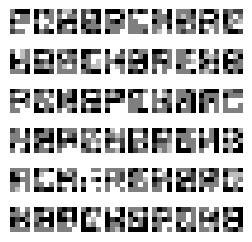

In [34]:
images = np.load("PCHE.npy")
X = images.reshape(80,20)
fig, axes = plt.subplots(6,10,figsize=(3,3))
k = 0
for i in range(6):
  for j in range(10):
    axes[i,j].set_axis_off()
    axes[i,j].imshow(images[k], cmap=plt.cm.gray_r)
    k+=1
y = np.array(["P","C","H","E"]*20)

**Multi-layer Perceptron**

1.0

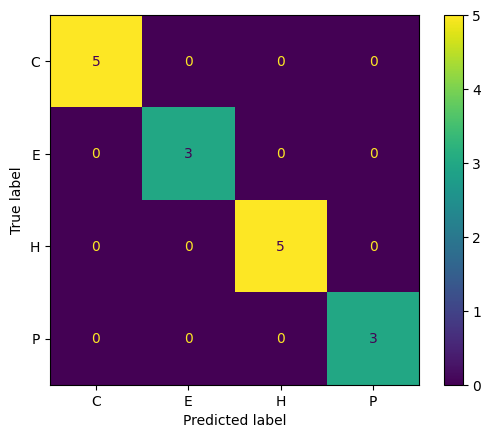

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

model = MLPClassifier(max_iter=100000)
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=333,train_size=0.8)
model.fit(Xtrain,ytrain)

ConfusionMatrixDisplay.from_predictions(model.predict(Xtest),ytest)
model.score(Xtest,ytest)

**Support Vector Machines**

1.0

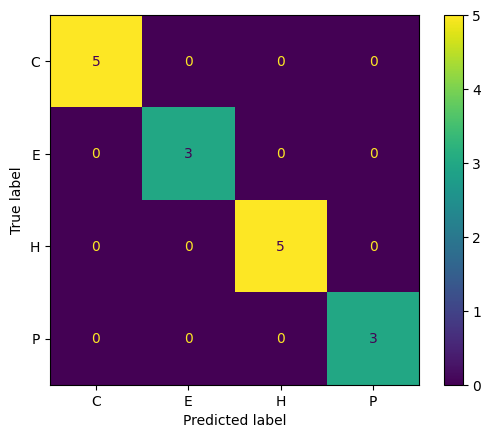

In [36]:
from sklearn.svm import SVC

model = SVC()
model.fit(Xtrain,ytrain)
ConfusionMatrixDisplay.from_predictions(model.predict(Xtest),ytest)
model.score(Xtest,ytest)

**Random Forest**

1.0

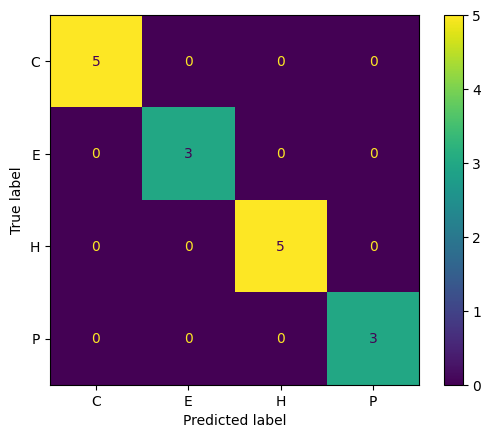

In [37]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(Xtrain,ytrain)
ConfusionMatrixDisplay.from_predictions(model.predict(Xtest),ytest)
model.score(Xtest,ytest)

**2.** Importar el dataset indicado y relizar un clustering con dos variables, seleccionandolas apropiadamente (puede codificar las variables categoricas), asi como escogiendo un numero apropiado de clusters.

In [38]:
file ="https://github.com/ivanmendozav/Clases/raw/main/toy_dataset.csv"

import pandas as pd
data = pd.read_csv(file)
del data["Number"]
data.head(5)

,City,Gender,Age,Income,Illness
0,Dallas,Male,41,40367.0,No
1,Dallas,Male,54,45084.0,No
2,Dallas,Male,42,52483.0,No
3,Dallas,Male,40,40941.0,No
4,Dallas,Male,46,50289.0,No


In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["City"] = encoder.fit_transform(data["City"])
data["Illness"] = encoder.fit_transform(data["Illness"])
data["Gender"] = encoder.fit_transform(data["Gender"])
data.head(5)

,City,Gender,Age,Income,Illness
0,2,1,41,40367.0,0
1,2,1,54,45084.0,0
2,2,1,42,52483.0,0
3,2,1,40,40941.0,0
4,2,1,46,50289.0,0


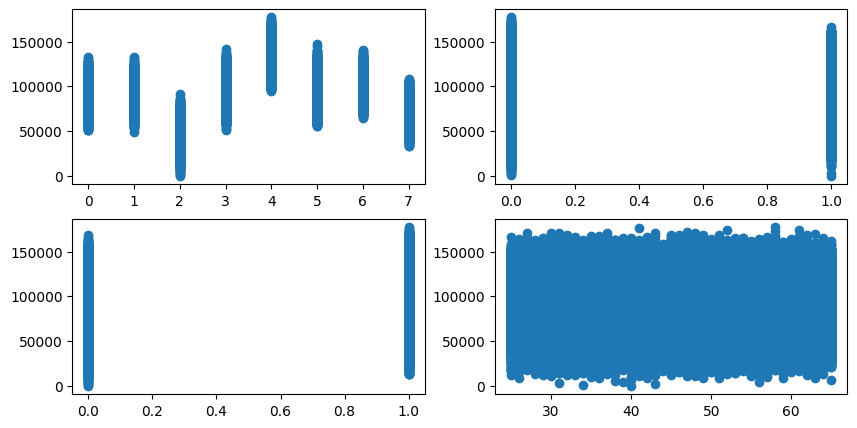

In [40]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,5))
figure.tight_layout()
axe1 = figure.add_subplot(2,2,1)
axe1.scatter(data["City"], data["Income"])
axe2 = figure.add_subplot(2,2,2)
axe2.scatter(data["Illness"], data["Income"])
axe3 = figure.add_subplot(2,2,3)
axe3.scatter(data["Gender"], data["Income"])
axe4 = figure.add_subplot(2,2,4)
axe4.scatter(data["Age"], data["Income"])

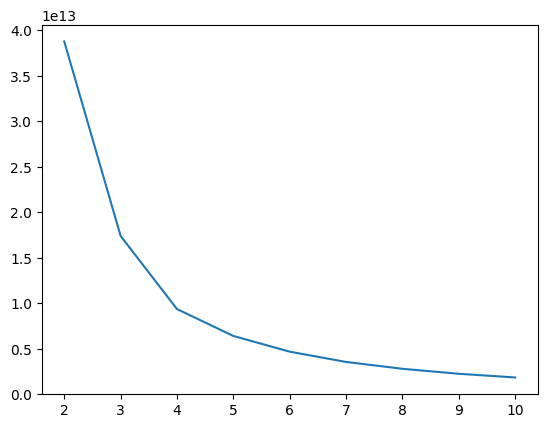

In [41]:
from sklearn.cluster import KMeans

K = 10
x = []
y = []
subdata = data[["Income","Age"]]
for k in range(2,K+1):
  clustering = KMeans(n_clusters=k, n_init=10).fit(subdata)
  x.append(k)
  y.append(clustering.inertia_)
plt.plot(x,y)

<Axes: xlabel='Income', ylabel='Age'>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


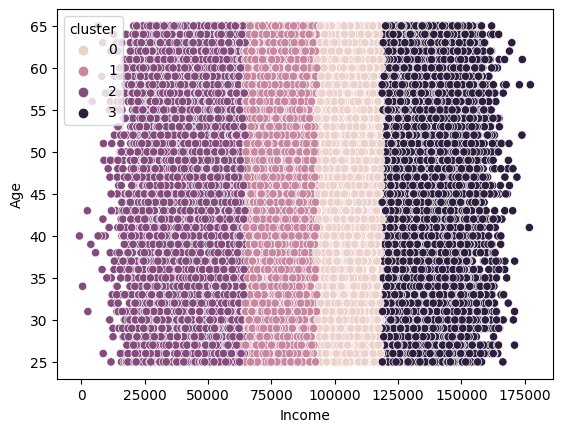

In [42]:
clustering = KMeans(n_clusters=4, n_init=10).fit(subdata)
data["cluster"] = clustering.labels_

import seaborn as sb
sb.scatterplot(data = data, x="Income", y="Age", hue="cluster")

In [43]:
print("Iteraciones:",clustering.n_iter_)
print("Centros:",clustering.cluster_centers_)
print("Valor inercia", clustering.inertia_)

Iteraciones: 11
Centros: [[1.02578101e+05 4.49428622e+01]
 [8.35231636e+04 4.49136465e+01]
 [4.59794120e+04 4.50276478e+01]
 [1.34788703e+05 4.49922961e+01]]
Valor inercia 9362650353074.652
